## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.7

In [8]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.9616 - acc: 0.2992 - val_loss: 1.8253 - val_acc: 0.3532
Epoch 2/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.7612 - acc: 0.3807 - val_loss: 1.7634 - val_acc: 0.3829
Epoch 3/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.6756 - acc: 0.4062 - val_loss: 1.6887 - val_acc: 0.3992
Epoch 4/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.6169 - acc: 0.4285 - val_loss: 1.6998 - val_acc: 0.3970
Epoch 5/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.5718 - acc: 0.4456 - val_loss: 1.6619 - val_acc: 0.4064
Epoch 6/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.5364 - acc: 0.4584 - val_loss: 1.6018 - val_acc: 0.4277
Epoch 7/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.5070 - acc: 0.4682 - val_loss: 1.5722 - 

Epoch 2/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.0163 - acc: 0.2979 - val_loss: 1.9676 - val_acc: 0.3080
Epoch 3/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.9324 - acc: 0.3252 - val_loss: 1.9011 - val_acc: 0.3404
Epoch 4/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.8821 - acc: 0.3437 - val_loss: 1.8606 - val_acc: 0.3560
Epoch 5/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.8471 - acc: 0.3538 - val_loss: 1.8333 - val_acc: 0.3635
Epoch 6/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.8204 - acc: 0.3645 - val_loss: 1.8165 - val_acc: 0.3612
Epoch 7/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.7976 - acc: 0.3721 - val_loss: 1.7888 - val_acc: 0.3727
Epoch 8/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.7779 - acc: 0.3788 - val_loss: 1.7668 - val_acc: 0.3853
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 6s 120us/step - loss: 2.2474 - acc: 0.1867 - val_loss: 2.2348 - val_acc: 0.1957
Epoch 4/50
50000/50000 [==============================] - 6s 119us/step - loss: 2.2247 - acc: 0.2058 - val_loss: 2.2140 - val_acc: 0.2122
Epoch 5/50
50000/50000 [==============================] - 6s 118us/step - loss: 2.2051 - acc: 0.2225 - val_loss: 2.1953 - val_acc: 0.2256
Epoch 6/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.1872 - acc: 0.2324 - val_loss: 2.1779 - val_acc: 0.2394
Epoch 7/50
50000/50000 [==============================] - 6s 119us/step - loss: 2.1704 - acc: 0.2425 - val_loss: 2.1613 - val_acc: 0.2445
Epoch 8/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.1544 - acc: 0.2484 - val_loss: 2.1455 - val_acc: 0.2541
Epoch 9/50
50000/50000 [==============================] - 6s 124us/step - loss: 2.1390 - acc: 0.2545 - val_loss: 2.1305 - val_acc: 0.2599
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 6s 119us/step - loss: 2.3047 - acc: 0.1182 - val_loss: 2.3022 - val_acc: 0.1206
Epoch 5/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.2972 - acc: 0.1244 - val_loss: 2.2951 - val_acc: 0.1230
Epoch 6/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.2909 - acc: 0.1291 - val_loss: 2.2891 - val_acc: 0.1262
Epoch 7/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.2854 - acc: 0.1330 - val_loss: 2.2838 - val_acc: 0.1283
Epoch 8/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.2806 - acc: 0.1363 - val_loss: 2.2791 - val_acc: 0.1321
Epoch 9/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.2763 - acc: 0.1392 - val_loss: 2.2748 - val_acc: 0.1369
Epoch 10/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.2724 - acc: 0.1416 - val_loss: 2.2710 - val_acc: 0.1392
Epoch 11/50
50000/50000 [===================

# MOMENTUM = 0.7 , nesterov=True

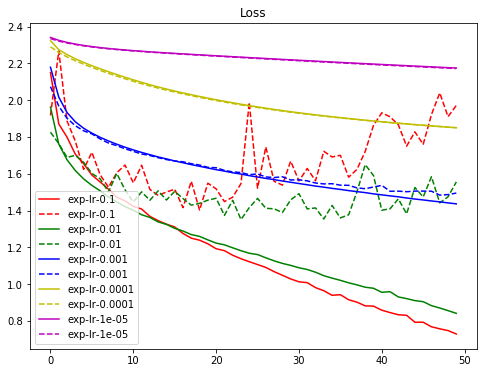

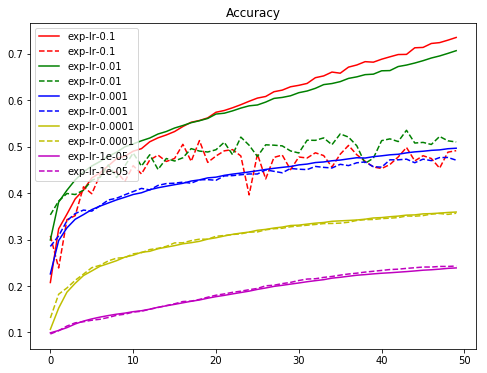

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# MOMENTUM = 0.7 , nesterov=False

In [11]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.9359 - acc: 0.3074 - val_loss: 1.8188 - val_acc: 0.3535
Epoch 2/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.7412 - acc: 0.3831 - val_loss: 1.7203 - val_acc: 0.3872
Epoch 3/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.6602 - acc: 0.4123 - val_loss: 1.6298 - val_acc: 0.4186
Epoch 4/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.6092 - acc: 0.4310 - val_loss: 1.6305 - val_acc: 0.4209
Epoch 5/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.5645 - acc: 0.4495 - val_loss: 1.5848 - val_acc: 0.4437
Epoch 6/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.5260 - acc: 0.4582 - val_loss: 1.6054 - val_acc: 0.4293
Epoch 7/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.4907 - acc: 0.4729 - val_loss: 1.5098 - 

Epoch 2/50
50000/50000 [==============================] - 5s 110us/step - loss: 2.0631 - acc: 0.2754 - val_loss: 2.0151 - val_acc: 0.2962
Epoch 3/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.9764 - acc: 0.3138 - val_loss: 1.9443 - val_acc: 0.3201
Epoch 4/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.9186 - acc: 0.3319 - val_loss: 1.8983 - val_acc: 0.3380
Epoch 5/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.8779 - acc: 0.3452 - val_loss: 1.8643 - val_acc: 0.3491
Epoch 6/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.8467 - acc: 0.3545 - val_loss: 1.8362 - val_acc: 0.3582
Epoch 7/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.8213 - acc: 0.3636 - val_loss: 1.8144 - val_acc: 0.3636
Epoch 8/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.7994 - acc: 0.3696 - val_loss: 1.7929 - val_acc: 0.3708
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 6s 112us/step - loss: 2.2436 - acc: 0.1819 - val_loss: 2.2325 - val_acc: 0.1934
Epoch 4/50
50000/50000 [==============================] - 5s 110us/step - loss: 2.2201 - acc: 0.2049 - val_loss: 2.2107 - val_acc: 0.2150
Epoch 5/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.1991 - acc: 0.2221 - val_loss: 2.1908 - val_acc: 0.2288
Epoch 6/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.1798 - acc: 0.2321 - val_loss: 2.1725 - val_acc: 0.2371
Epoch 7/50
50000/50000 [==============================] - 6s 111us/step - loss: 2.1619 - acc: 0.2408 - val_loss: 2.1555 - val_acc: 0.2439
Epoch 8/50
50000/50000 [==============================] - 6s 113us/step - loss: 2.1451 - acc: 0.2495 - val_loss: 2.1391 - val_acc: 0.2479
Epoch 9/50
50000/50000 [==============================] - 6s 114us/step - loss: 2.1290 - acc: 0.2536 - val_loss: 2.1234 - val_acc: 0.2545
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 5s 109us/step - loss: 2.3269 - acc: 0.1098 - val_loss: 2.3189 - val_acc: 0.1099
Epoch 5/50
50000/50000 [==============================] - 5s 110us/step - loss: 2.3162 - acc: 0.1120 - val_loss: 2.3098 - val_acc: 0.1124
Epoch 6/50
50000/50000 [==============================] - 6s 111us/step - loss: 2.3079 - acc: 0.1137 - val_loss: 2.3025 - val_acc: 0.1131
Epoch 7/50
50000/50000 [==============================] - 6s 110us/step - loss: 2.3011 - acc: 0.1151 - val_loss: 2.2964 - val_acc: 0.1144
Epoch 8/50
50000/50000 [==============================] - 5s 110us/step - loss: 2.2954 - acc: 0.1172 - val_loss: 2.2912 - val_acc: 0.1164
Epoch 9/50
50000/50000 [==============================] - 5s 110us/step - loss: 2.2904 - acc: 0.1190 - val_loss: 2.2866 - val_acc: 0.1183
Epoch 10/50
50000/50000 [==============================] - 5s 110us/step - loss: 2.2860 - acc: 0.1216 - val_loss: 2.2825 - val_acc: 0.1193
Epoch 11/50
50000/50000 [===================

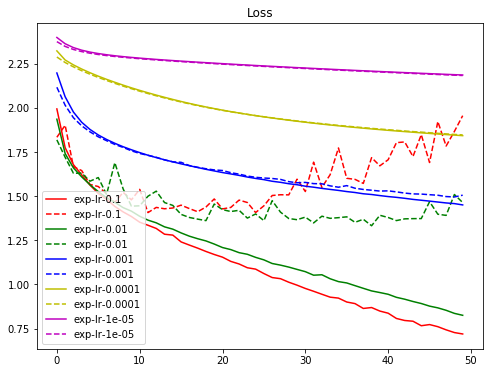

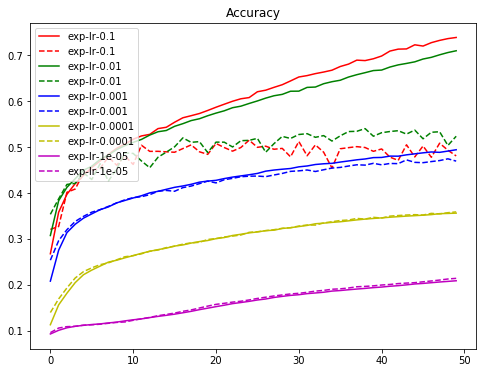

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# MOMENTUM = 0.5,  nesterov=True

In [13]:
MOMENTUM = 0.5
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 127us/step - loss: 2.0283 - acc: 0.2698 - val_loss: 2.0165 - val_acc: 0.2386
Epoch 2/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.8376 - acc: 0.3498 - val_loss: 1.9229 - val_acc: 0.3184
Epoch 3/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.7625 - acc: 0.3770 - val_loss: 1.8021 - val_acc: 0.3585
Epoch 4/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.7066 - acc: 0.3984 - val_loss: 1.7066 - val_acc: 0.3950
Epoch 5/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.6624 - acc: 0.4128 - val_loss: 1.6501 - val_acc: 0.4143
Epoch 6/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.6280 - acc: 0.4262 - val_loss: 1.6149 - val_acc: 0.4272
Epoch 7/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.5995 - acc: 0.4367 - val_loss: 1.6032 - 

Epoch 2/50
50000/50000 [==============================] - 6s 124us/step - loss: 2.1420 - acc: 0.2555 - val_loss: 2.1040 - val_acc: 0.2711
Epoch 3/50
50000/50000 [==============================] - 6s 123us/step - loss: 2.0667 - acc: 0.2836 - val_loss: 2.0382 - val_acc: 0.2871
Epoch 4/50
50000/50000 [==============================] - 6s 123us/step - loss: 2.0076 - acc: 0.3001 - val_loss: 1.9859 - val_acc: 0.3091
Epoch 5/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.9610 - acc: 0.3125 - val_loss: 1.9429 - val_acc: 0.3173
Epoch 6/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.9228 - acc: 0.3234 - val_loss: 1.9096 - val_acc: 0.3274
Epoch 7/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.8918 - acc: 0.3355 - val_loss: 1.8808 - val_acc: 0.3450
Epoch 8/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.8656 - acc: 0.3458 - val_loss: 1.8577 - val_acc: 0.3486
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 6s 121us/step - loss: 2.2789 - acc: 0.1480 - val_loss: 2.2698 - val_acc: 0.1598
Epoch 4/50
50000/50000 [==============================] - 6s 122us/step - loss: 2.2656 - acc: 0.1667 - val_loss: 2.2577 - val_acc: 0.1761
Epoch 5/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.2541 - acc: 0.1823 - val_loss: 2.2468 - val_acc: 0.1906
Epoch 6/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.2434 - acc: 0.1954 - val_loss: 2.2364 - val_acc: 0.2024
Epoch 7/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.2331 - acc: 0.2045 - val_loss: 2.2262 - val_acc: 0.2125
Epoch 8/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.2227 - acc: 0.2131 - val_loss: 2.2160 - val_acc: 0.2200
Epoch 9/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.2124 - acc: 0.2210 - val_loss: 2.2058 - val_acc: 0.2271
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 6s 121us/step - loss: 2.3371 - acc: 0.1017 - val_loss: 2.3309 - val_acc: 0.1019
Epoch 5/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.3275 - acc: 0.1050 - val_loss: 2.3221 - val_acc: 0.1036
Epoch 6/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.3195 - acc: 0.1078 - val_loss: 2.3148 - val_acc: 0.1073
Epoch 7/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.3130 - acc: 0.1116 - val_loss: 2.3087 - val_acc: 0.1130
Epoch 8/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.3074 - acc: 0.1157 - val_loss: 2.3035 - val_acc: 0.1173
Epoch 9/50
50000/50000 [==============================] - 6s 122us/step - loss: 2.3026 - acc: 0.1200 - val_loss: 2.2990 - val_acc: 0.1199
Epoch 10/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.2984 - acc: 0.1246 - val_loss: 2.2950 - val_acc: 0.1255
Epoch 11/50
50000/50000 [===================

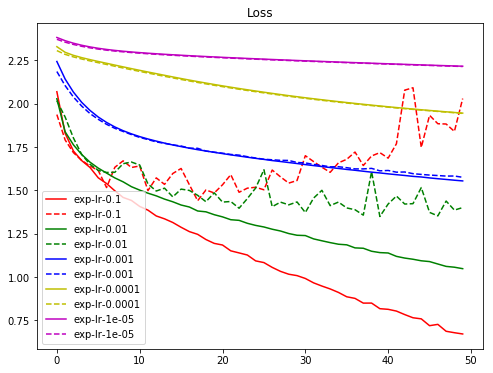

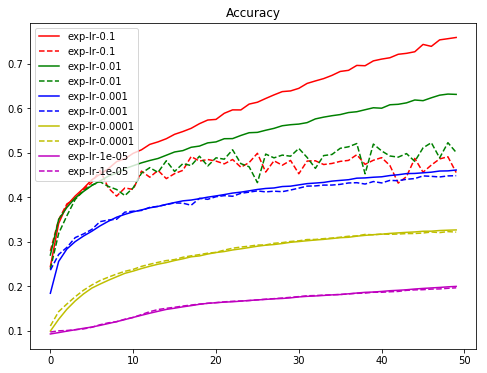

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# MOMENTUM = 0.5 , nesterov=False

In [15]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.9888 - acc: 0.2914 - val_loss: 1.8918 - val_acc: 0.3195
Epoch 2/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.8040 - acc: 0.3634 - val_loss: 1.7716 - val_acc: 0.3688
Epoch 3/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.7255 - acc: 0.3930 - val_loss: 1.6988 - val_acc: 0.3951
Epoch 4/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.6743 - acc: 0.4092 - val_loss: 1.6607 - val_acc: 0.4185
Epoch 5/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.6305 - acc: 0.4239 - val_loss: 1.6741 - val_acc: 0.4127
Epoch 6/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.5965 - acc: 0.4383 - val_loss: 1.6006 - val_acc: 0.4310
Epoch 7/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.5679 - acc: 0.4465 - val_loss: 1.6214 - 

Epoch 2/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.0989 - acc: 0.2687 - val_loss: 2.0569 - val_acc: 0.2736
Epoch 3/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.0229 - acc: 0.2967 - val_loss: 1.9951 - val_acc: 0.3014
Epoch 4/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.9706 - acc: 0.3126 - val_loss: 1.9514 - val_acc: 0.3155
Epoch 5/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.9314 - acc: 0.3250 - val_loss: 1.9165 - val_acc: 0.3290
Epoch 6/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.9010 - acc: 0.3373 - val_loss: 1.8932 - val_acc: 0.3330
Epoch 7/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.8773 - acc: 0.3447 - val_loss: 1.8683 - val_acc: 0.3442
Epoch 8/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.8570 - acc: 0.3515 - val_loss: 1.8510 - val_acc: 0.3563
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 5s 108us/step - loss: 2.2552 - acc: 0.1707 - val_loss: 2.2479 - val_acc: 0.1742
Epoch 4/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.2400 - acc: 0.1844 - val_loss: 2.2338 - val_acc: 0.1864
Epoch 5/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.2265 - acc: 0.1975 - val_loss: 2.2209 - val_acc: 0.1955
Epoch 6/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.2138 - acc: 0.2070 - val_loss: 2.2085 - val_acc: 0.2033
Epoch 7/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.2015 - acc: 0.2152 - val_loss: 2.1962 - val_acc: 0.2153
Epoch 8/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.1893 - acc: 0.2222 - val_loss: 2.1841 - val_acc: 0.2254
Epoch 9/50
50000/50000 [==============================] - 5s 110us/step - loss: 2.1774 - acc: 0.2316 - val_loss: 2.1725 - val_acc: 0.2316
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 5s 109us/step - loss: 2.3238 - acc: 0.1188 - val_loss: 2.3173 - val_acc: 0.1221
Epoch 5/50
50000/50000 [==============================] - 5s 110us/step - loss: 2.3170 - acc: 0.1203 - val_loss: 2.3112 - val_acc: 0.1223
Epoch 6/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.3113 - acc: 0.1217 - val_loss: 2.3061 - val_acc: 0.1242
Epoch 7/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.3064 - acc: 0.1231 - val_loss: 2.3017 - val_acc: 0.1264
Epoch 8/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.3020 - acc: 0.1246 - val_loss: 2.2977 - val_acc: 0.1275
Epoch 9/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.2982 - acc: 0.1263 - val_loss: 2.2941 - val_acc: 0.1283
Epoch 10/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.2947 - acc: 0.1291 - val_loss: 2.2908 - val_acc: 0.1307
Epoch 11/50
50000/50000 [===================

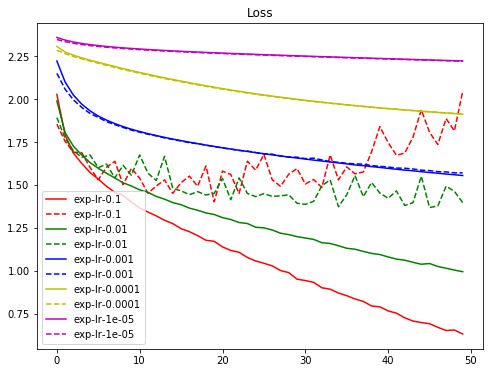

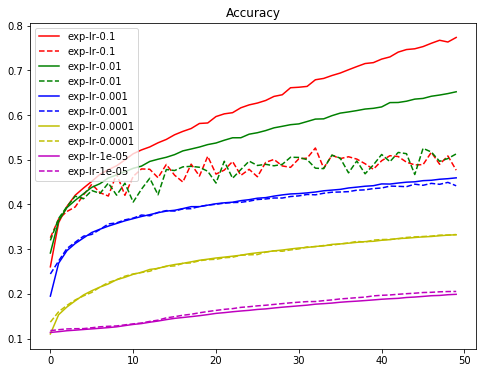

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# MOMENTUM = 0.3,  nesterov=True

In [17]:
MOMENTUM = 0.3
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 126us/step - loss: 2.0132 - acc: 0.2825 - val_loss: 1.9981 - val_acc: 0.2604
Epoch 2/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.8459 - acc: 0.3468 - val_loss: 1.9485 - val_acc: 0.2983
Epoch 3/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.7791 - acc: 0.3743 - val_loss: 1.7510 - val_acc: 0.3742
Epoch 4/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.7321 - acc: 0.3909 - val_loss: 1.7947 - val_acc: 0.3573
Epoch 5/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.6885 - acc: 0.4080 - val_loss: 1.7132 - val_acc: 0.3853
Epoch 6/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.6573 - acc: 0.4164 - val_loss: 1.7087 - val_acc: 0.3927
Epoch 7/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.6289 - acc: 0.4276 - val_loss: 1.6494 - 

Epoch 2/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.1685 - acc: 0.2424 - val_loss: 2.1259 - val_acc: 0.2701
Epoch 3/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.0981 - acc: 0.2753 - val_loss: 2.0651 - val_acc: 0.2829
Epoch 4/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.0447 - acc: 0.2904 - val_loss: 2.0182 - val_acc: 0.3083
Epoch 5/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.0019 - acc: 0.3038 - val_loss: 1.9815 - val_acc: 0.3111
Epoch 6/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.9672 - acc: 0.3138 - val_loss: 1.9496 - val_acc: 0.3203
Epoch 7/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.9386 - acc: 0.3226 - val_loss: 1.9242 - val_acc: 0.3269
Epoch 8/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.9155 - acc: 0.3297 - val_loss: 1.9051 - val_acc: 0.3327
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 6s 120us/step - loss: 2.2646 - acc: 0.1463 - val_loss: 2.2596 - val_acc: 0.1536
Epoch 4/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.2525 - acc: 0.1610 - val_loss: 2.2483 - val_acc: 0.1658
Epoch 5/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.2414 - acc: 0.1733 - val_loss: 2.2377 - val_acc: 0.1761
Epoch 6/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.2309 - acc: 0.1829 - val_loss: 2.2277 - val_acc: 0.1850
Epoch 7/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.2209 - acc: 0.1916 - val_loss: 2.2180 - val_acc: 0.1941
Epoch 8/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.2113 - acc: 0.2001 - val_loss: 2.2088 - val_acc: 0.1993
Epoch 9/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.2020 - acc: 0.2053 - val_loss: 2.1998 - val_acc: 0.2084
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 6s 120us/step - loss: 2.3628 - acc: 0.1225 - val_loss: 2.3596 - val_acc: 0.1202
Epoch 5/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.3513 - acc: 0.1212 - val_loss: 2.3490 - val_acc: 0.1192
Epoch 6/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.3417 - acc: 0.1187 - val_loss: 2.3401 - val_acc: 0.1181
Epoch 7/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.3336 - acc: 0.1175 - val_loss: 2.3326 - val_acc: 0.1152
Epoch 8/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.3267 - acc: 0.1165 - val_loss: 2.3261 - val_acc: 0.1144
Epoch 9/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.3207 - acc: 0.1164 - val_loss: 2.3205 - val_acc: 0.1137
Epoch 10/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.3155 - acc: 0.1167 - val_loss: 2.3155 - val_acc: 0.1137
Epoch 11/50
50000/50000 [===================

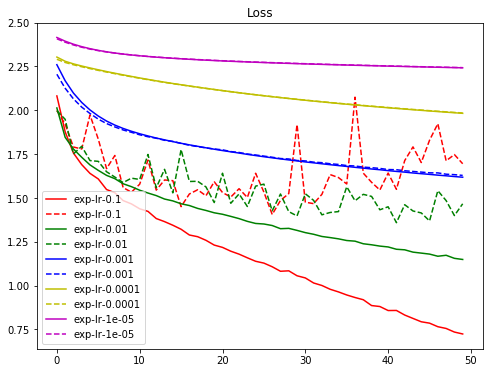

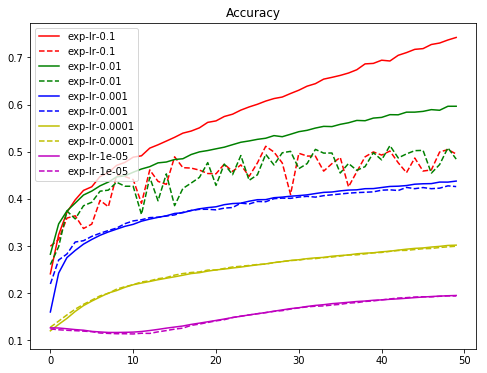

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# MOMENTUM = 0.3,  nesterov=False

In [19]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 116us/step - loss: 2.0299 - acc: 0.2729 - val_loss: 1.9023 - val_acc: 0.3295
Epoch 2/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.8417 - acc: 0.3496 - val_loss: 1.8949 - val_acc: 0.3161
Epoch 3/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.7740 - acc: 0.3756 - val_loss: 1.7742 - val_acc: 0.3685
Epoch 4/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.7252 - acc: 0.3930 - val_loss: 1.6998 - val_acc: 0.4022
Epoch 5/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.6870 - acc: 0.4047 - val_loss: 1.7919 - val_acc: 0.3588
Epoch 6/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.6540 - acc: 0.4166 - val_loss: 1.6357 - val_acc: 0.4245
Epoch 7/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.6262 - acc: 0.4272 - val_loss: 1.6315 - 

Epoch 2/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.1341 - acc: 0.2344 - val_loss: 2.0921 - val_acc: 0.2496
Epoch 3/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.0653 - acc: 0.2630 - val_loss: 2.0354 - val_acc: 0.2701
Epoch 4/50
50000/50000 [==============================] - 5s 110us/step - loss: 2.0165 - acc: 0.2826 - val_loss: 1.9934 - val_acc: 0.2900
Epoch 5/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.9790 - acc: 0.2997 - val_loss: 1.9592 - val_acc: 0.3111
Epoch 6/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.9490 - acc: 0.3140 - val_loss: 1.9330 - val_acc: 0.3189
Epoch 7/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.9241 - acc: 0.3240 - val_loss: 1.9105 - val_acc: 0.3293
Epoch 8/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.9032 - acc: 0.3345 - val_loss: 1.8933 - val_acc: 0.3350
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 5s 108us/step - loss: 2.2941 - acc: 0.1235 - val_loss: 2.2842 - val_acc: 0.1397
Epoch 4/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.2798 - acc: 0.1363 - val_loss: 2.2710 - val_acc: 0.1510
Epoch 5/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.2668 - acc: 0.1515 - val_loss: 2.2586 - val_acc: 0.1631
Epoch 6/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.2547 - acc: 0.1657 - val_loss: 2.2468 - val_acc: 0.1738
Epoch 7/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.2430 - acc: 0.1774 - val_loss: 2.2351 - val_acc: 0.1862
Epoch 8/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.2313 - acc: 0.1870 - val_loss: 2.2235 - val_acc: 0.1960
Epoch 9/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.2197 - acc: 0.1975 - val_loss: 2.2119 - val_acc: 0.2048
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 5s 110us/step - loss: 2.3377 - acc: 0.0990 - val_loss: 2.3345 - val_acc: 0.0988
Epoch 5/50
50000/50000 [==============================] - 6s 111us/step - loss: 2.3302 - acc: 0.0997 - val_loss: 2.3277 - val_acc: 0.0979
Epoch 6/50
50000/50000 [==============================] - 5s 110us/step - loss: 2.3238 - acc: 0.0998 - val_loss: 2.3218 - val_acc: 0.0979
Epoch 7/50
50000/50000 [==============================] - 5s 110us/step - loss: 2.3182 - acc: 0.1007 - val_loss: 2.3166 - val_acc: 0.0992
Epoch 8/50
50000/50000 [==============================] - 5s 110us/step - loss: 2.3133 - acc: 0.1013 - val_loss: 2.3120 - val_acc: 0.1010
Epoch 9/50
50000/50000 [==============================] - 5s 110us/step - loss: 2.3089 - acc: 0.1026 - val_loss: 2.3078 - val_acc: 0.1009
Epoch 10/50
50000/50000 [==============================] - 5s 110us/step - loss: 2.3049 - acc: 0.1040 - val_loss: 2.3041 - val_acc: 0.1016
Epoch 11/50
50000/50000 [===================

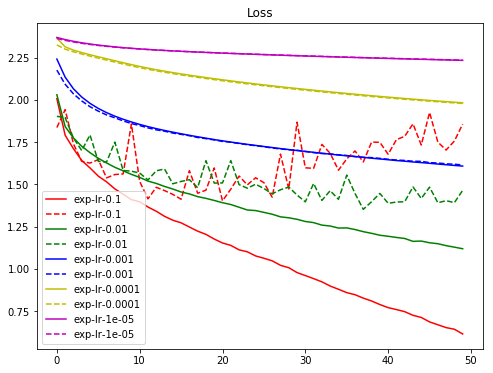

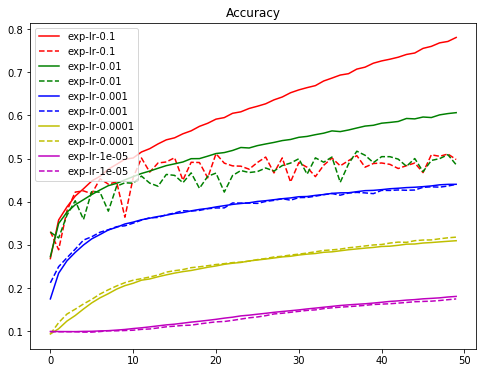

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()